
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, November 12th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Please ensure that the notebook you have uploaded on Canvas is the correct one, you could download the notebook from Canvas to double check that you have submitted the correct version on your notebook.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Alisha Fernandes
2. Haritha Maheshkumar

## Question 1 - Expected Risk Minimization (15 pts)
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$
where the cost of rejection is a constant. Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ for the following three cases - 
1. c = 0
2. c = 2
3. c = 1

### Answer


1. 

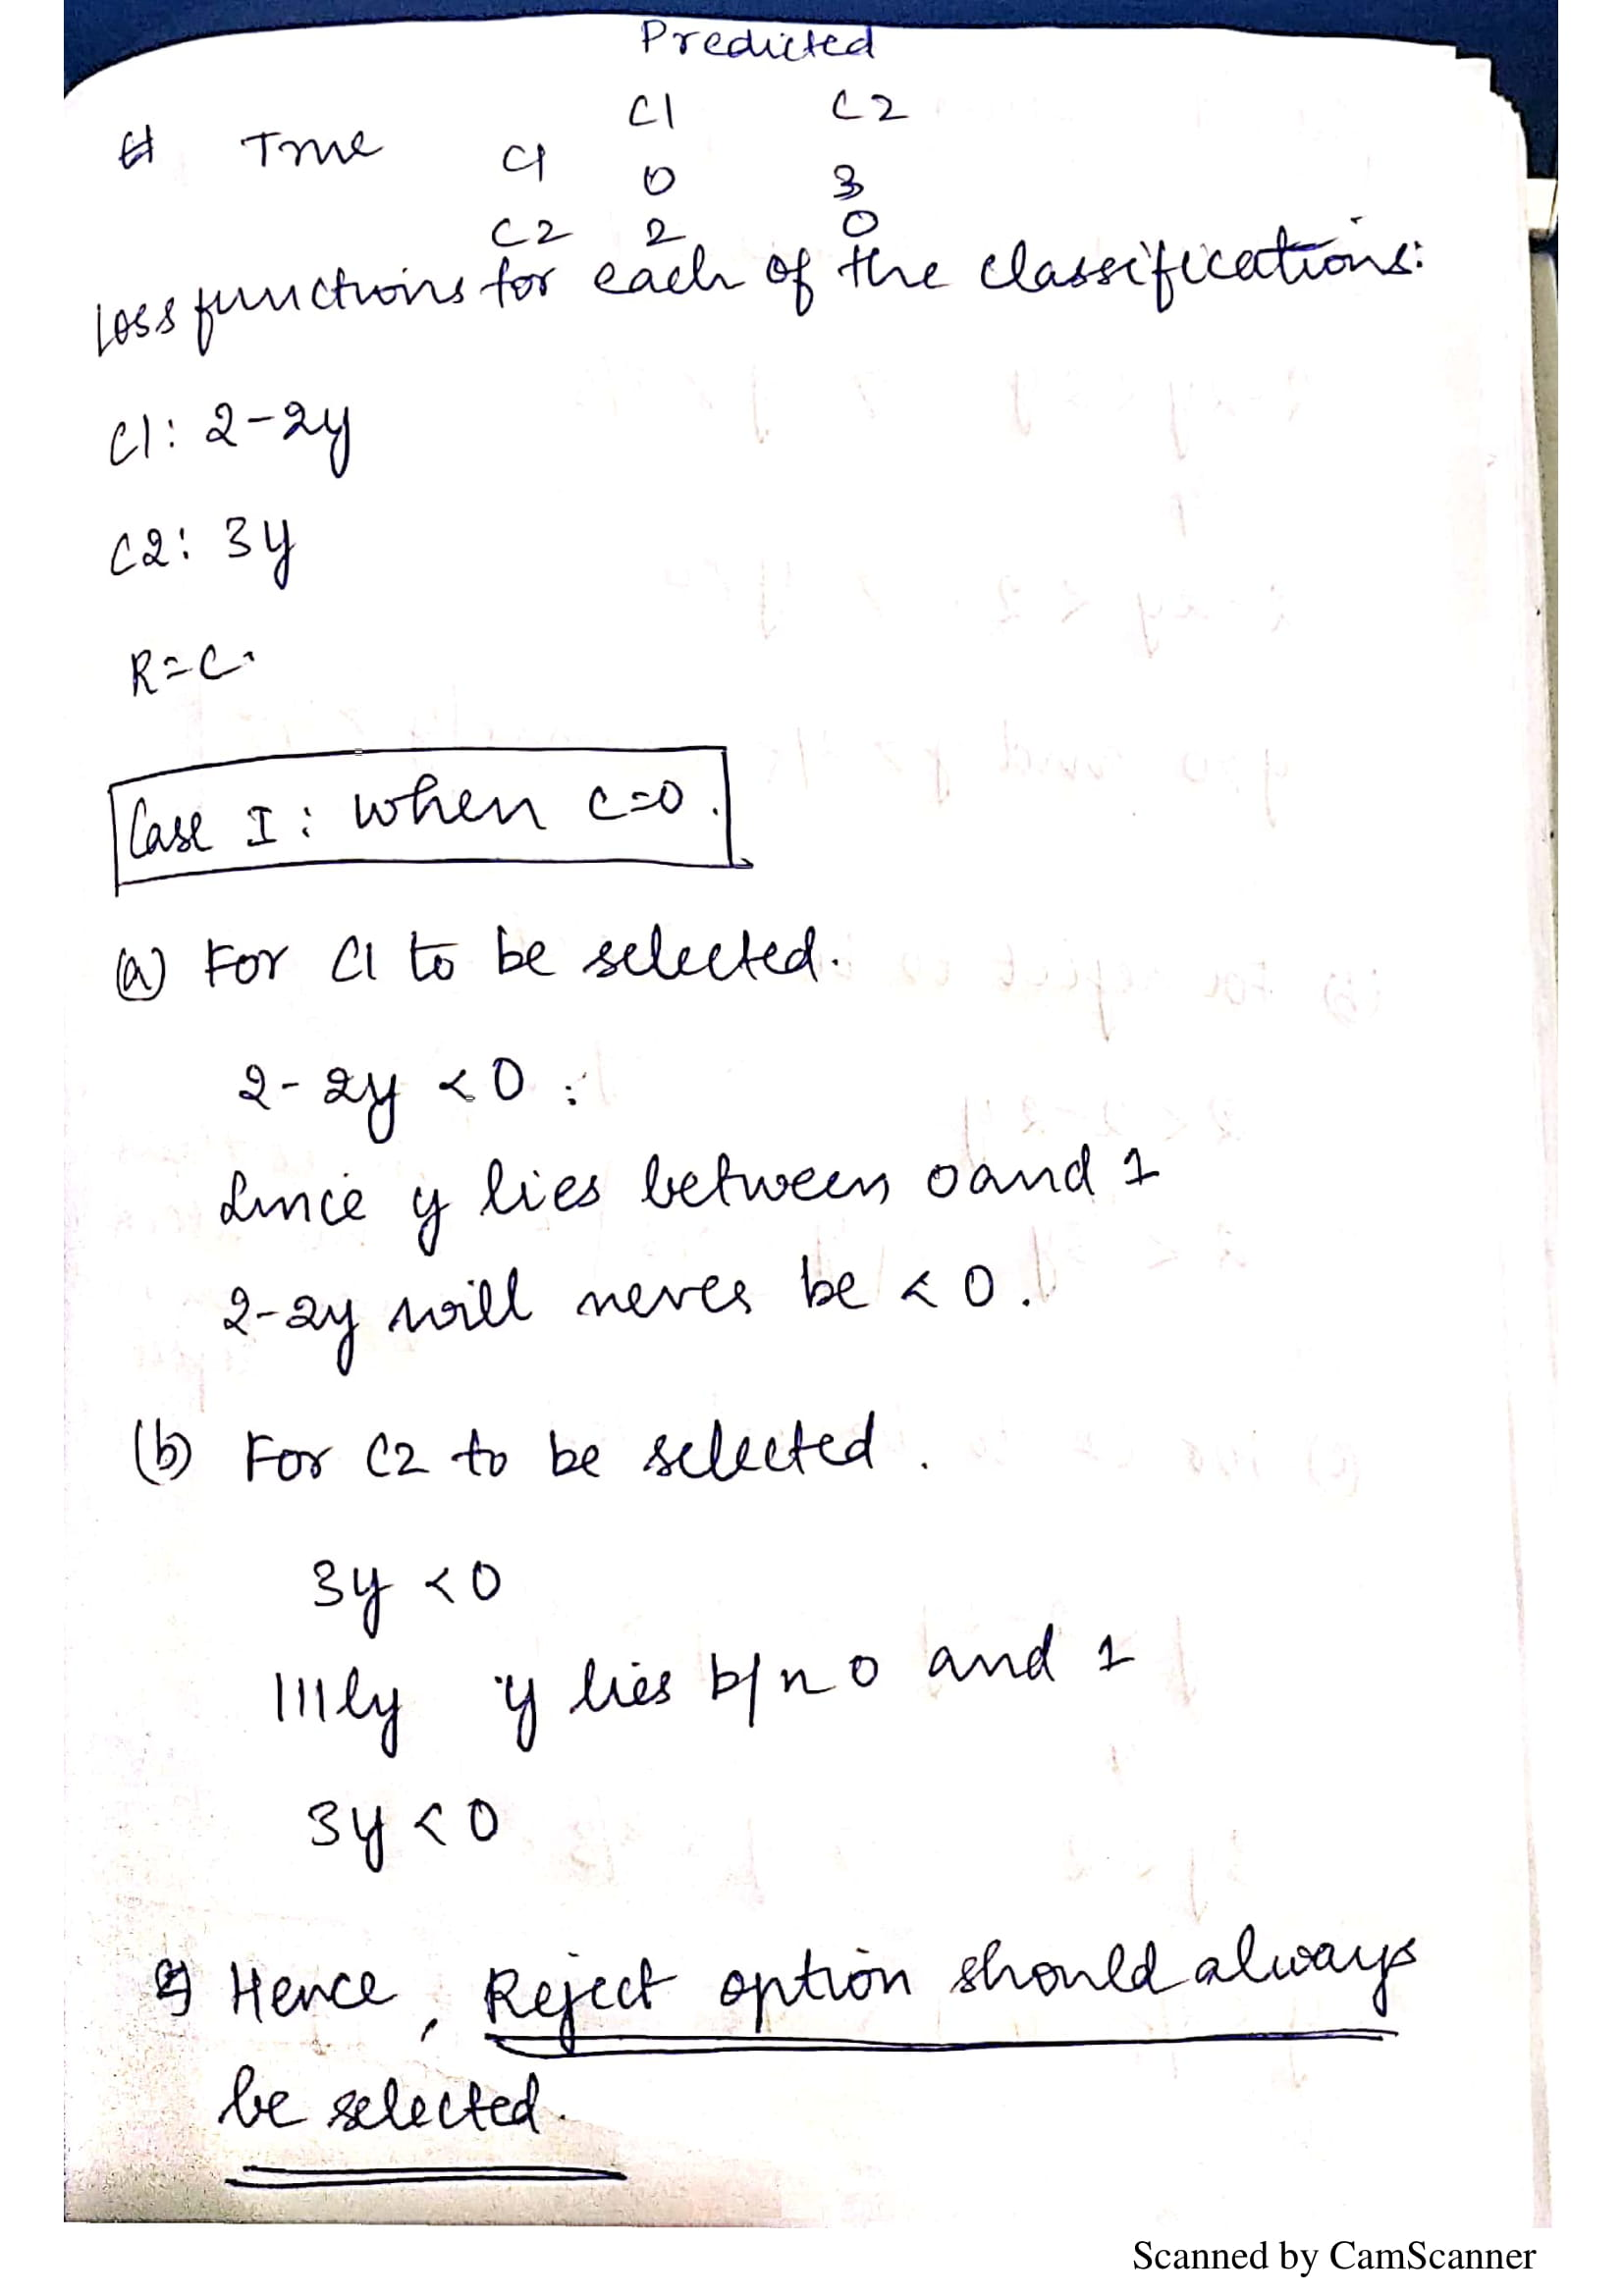

In [32]:
from IPython.display import Image
Image("APM HW Q1-1.jpg")

2. 

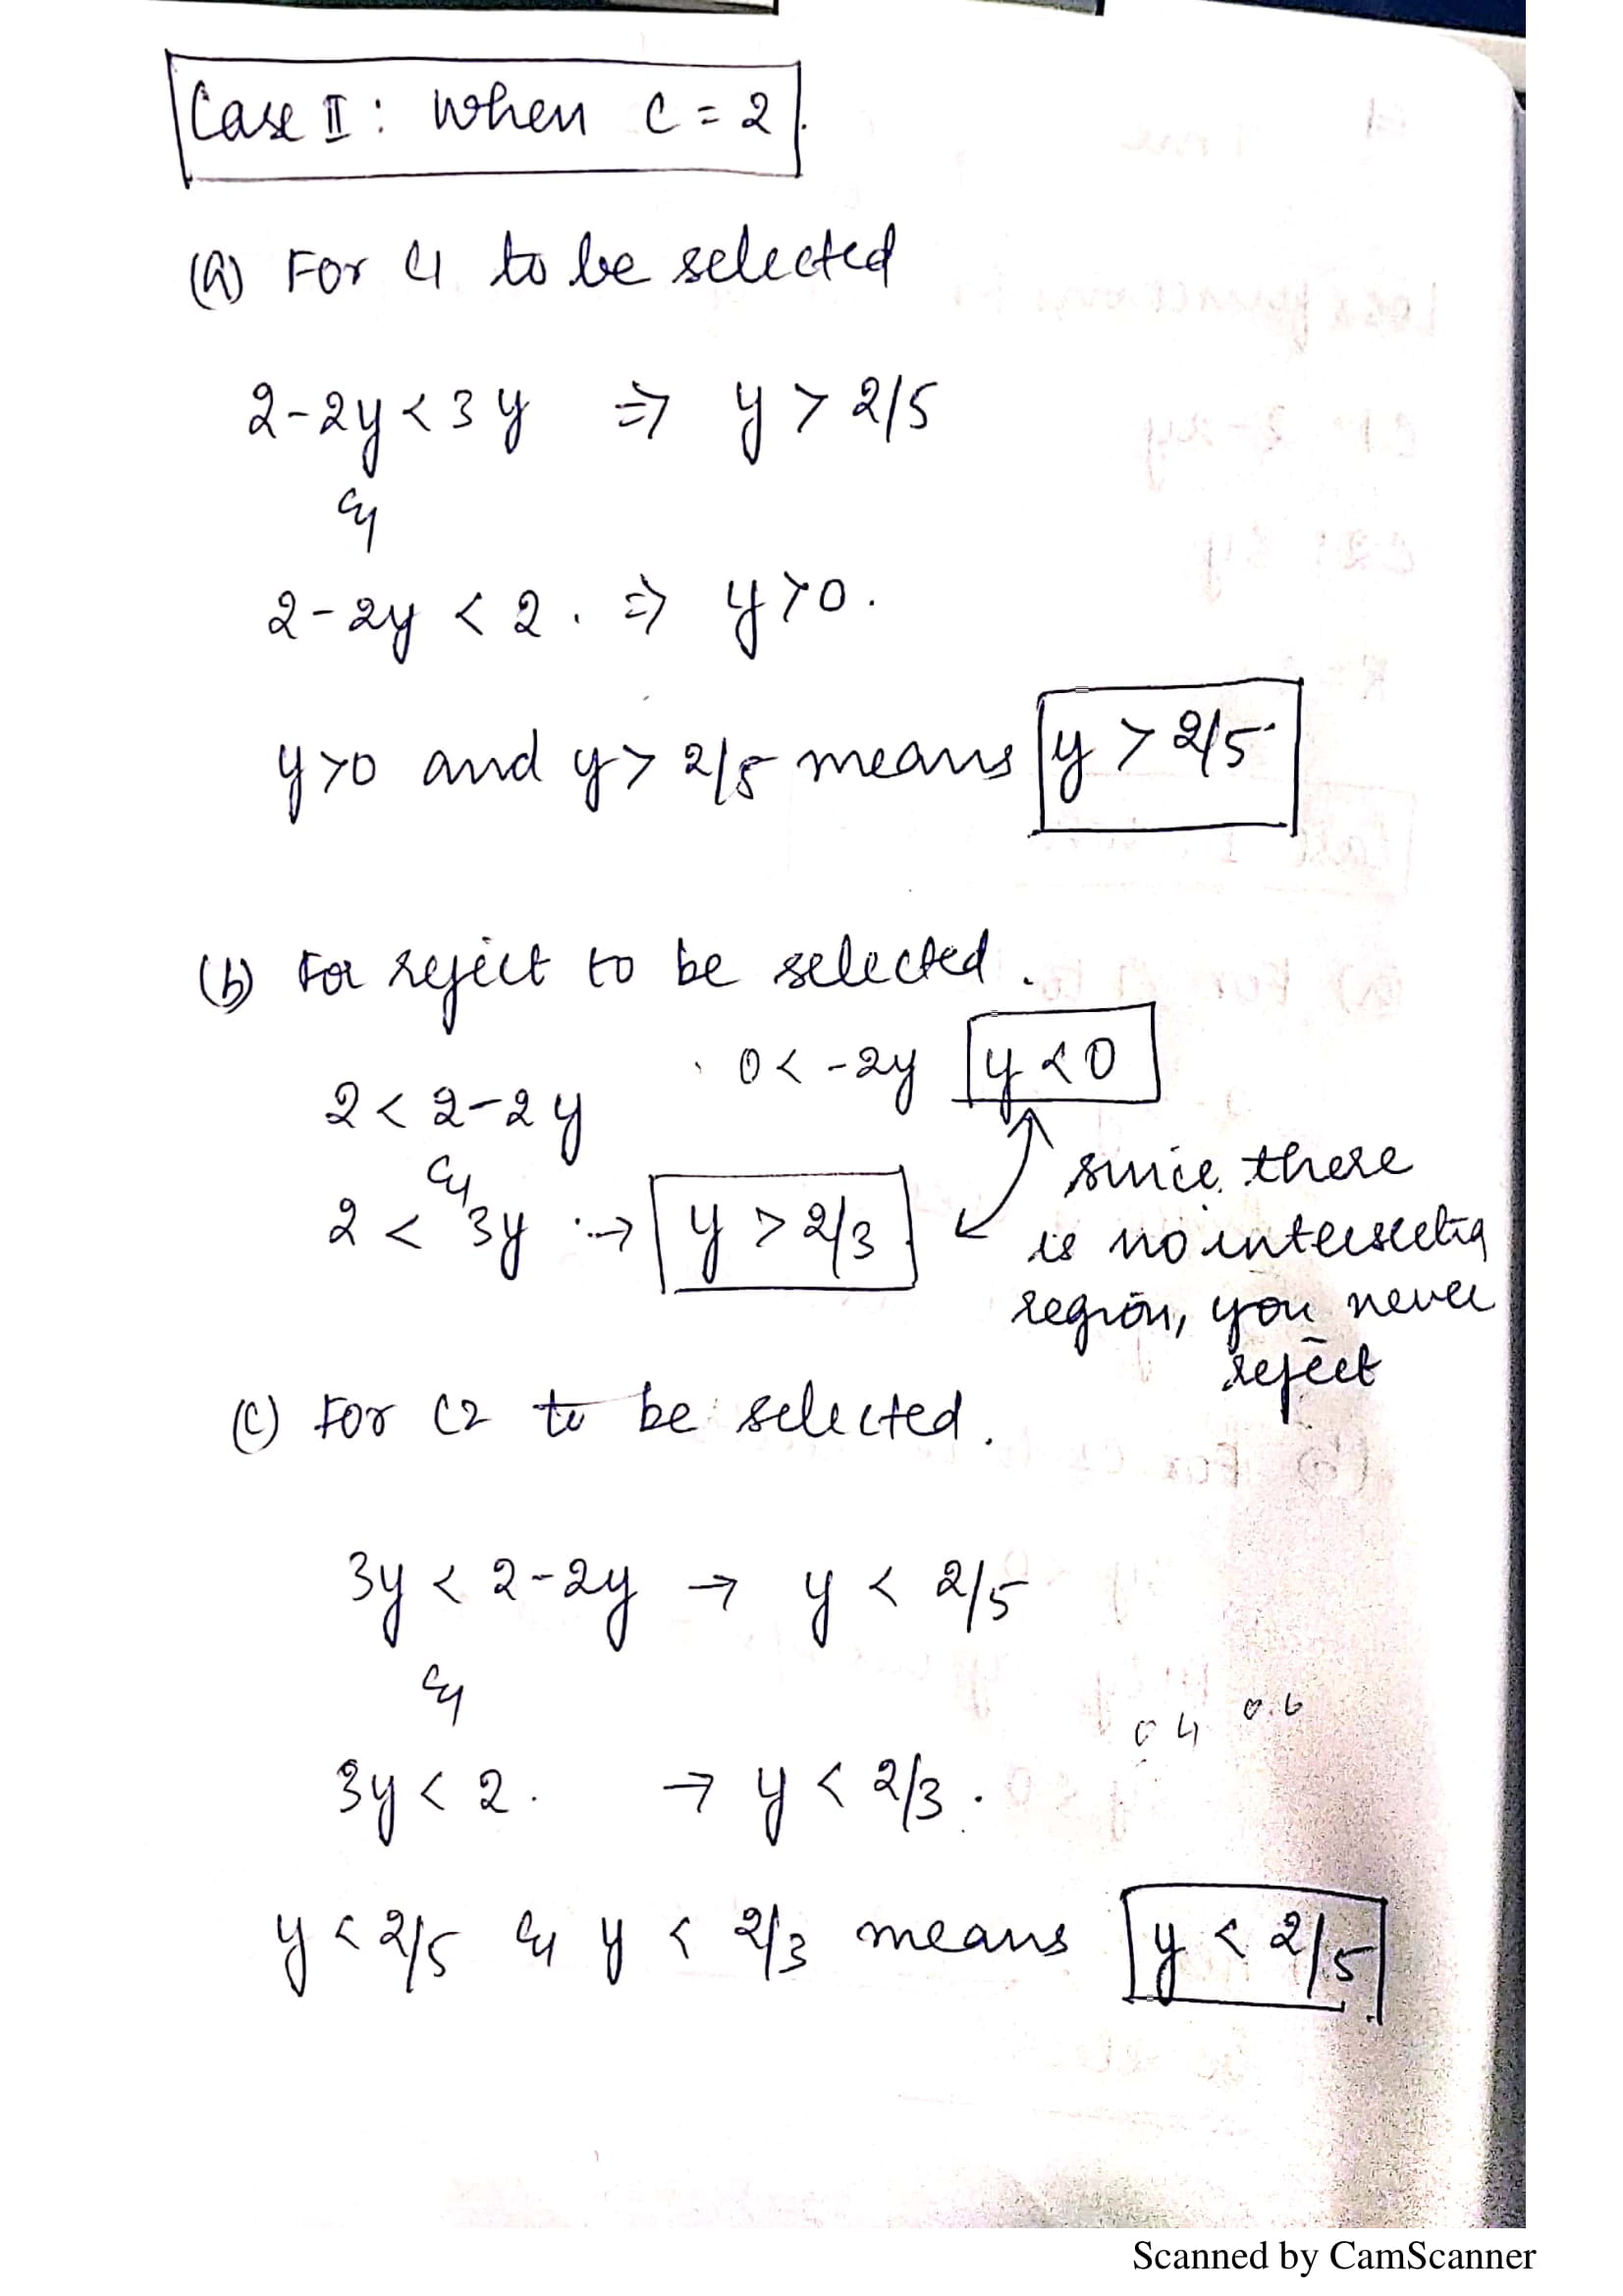

In [33]:
from IPython.display import Image
Image("APM HW Q1-2.jpg")

3. 

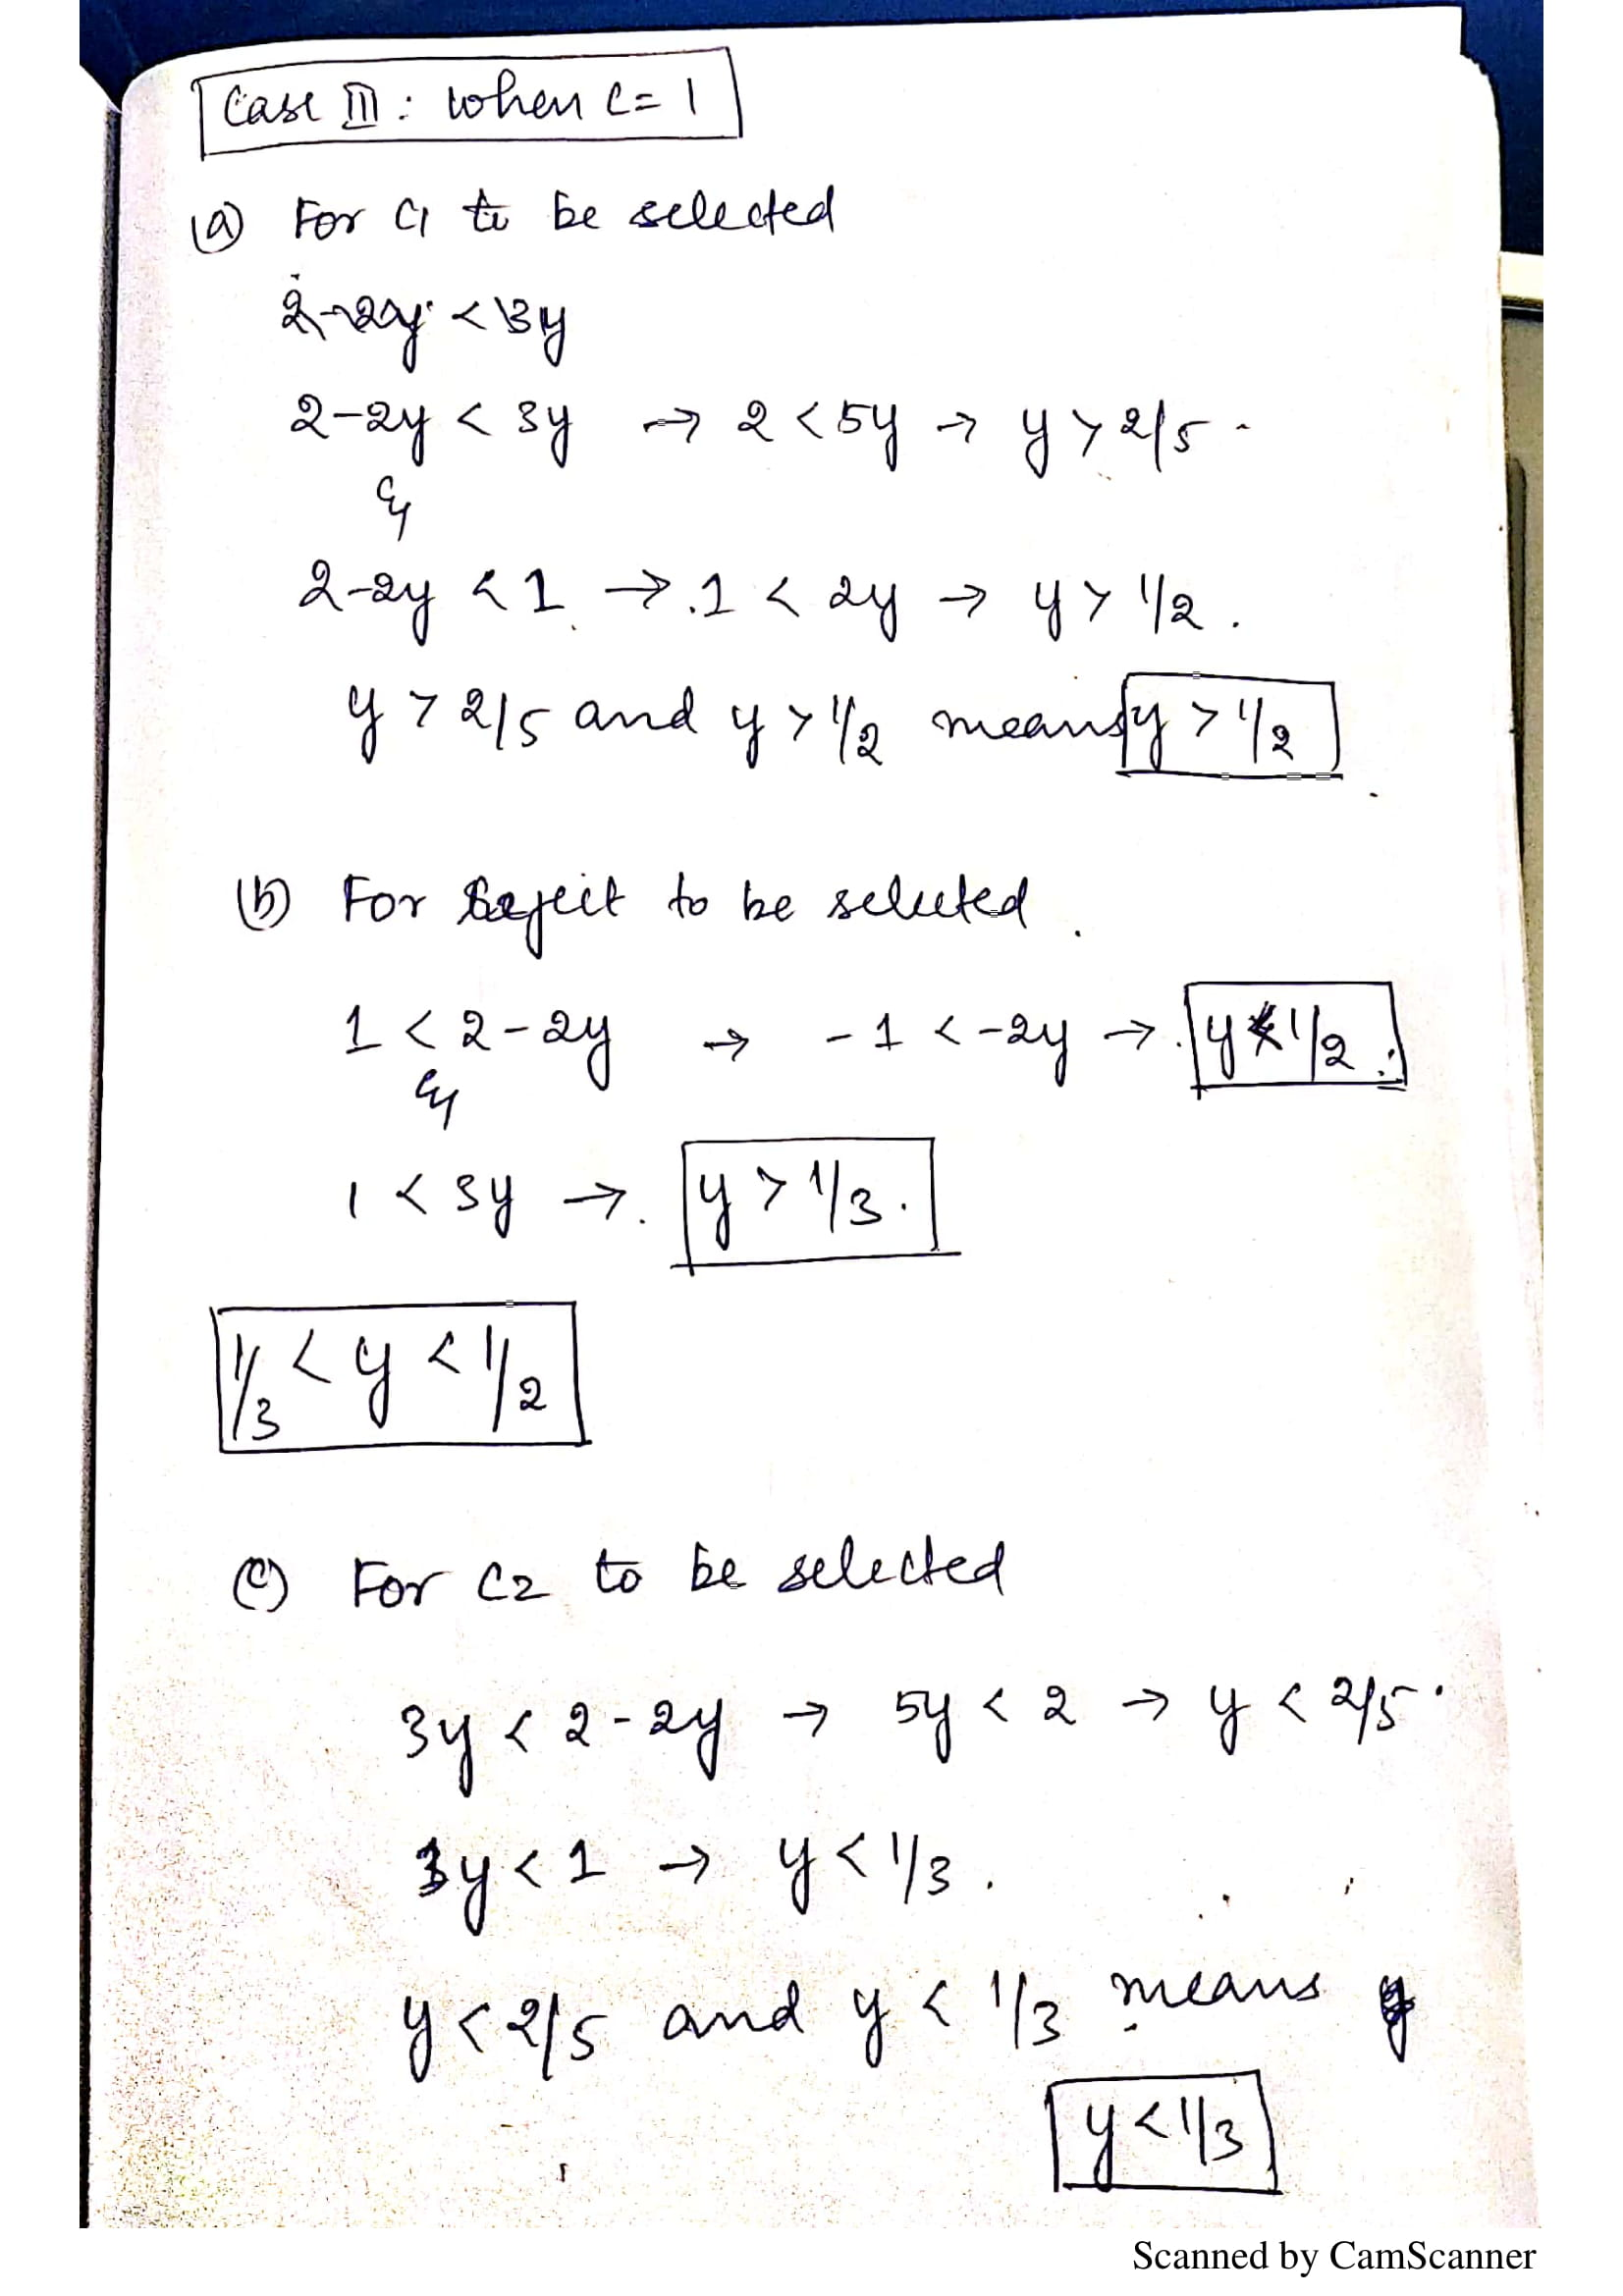

In [34]:
from IPython.display import Image
Image("APM HW Q1-3.jpg")

## Question 2 - Concepts (10 pts)

Emma is a high school student who is creating a model for spam classification, which is well known to be an imbalanced classification problem. During the course of modeling, she had various observations and she is not sure if these observations suggest anything about the correctness of her modeling exercise. You are given two such instances below. For each observation identify what the problem with it may be (if any) and suggest a way to correct it. 

1. She thinks that the most important signal to identify spam emails is the sender. So, she creates a feature called is_sender_spammer and populates it with the percentage of emails sent by the sender that were spam, in the given dataset. The way she created this feature was - for each email, she counted the number of emails sent by each sender which were labeled as true spam and divided by the total number of emails sent by the sender. She then divides the given dataset into train and test and trains a logistic regression classifier using just this one feature. The AUROC on the test dataset comes out to be 0.99. She thinks this is too good to be true. What do you think may be the problem with her approach, and how can this be fixed?

2. She then changes her approach and tries multiple sets of features with different models. She finds out that whatever features or models she uses the classification accuracy on the test dataset is always above 90%. Why do you think this could happen?


1. Problem - is_sender_spammer variable used in the test dataset is derived from information based on the entire data

is_sender_spammer = # of spam e-mails sent by sender / # of overall e-mails sent by spammer.

1. Firstly, irrespective of the train and test datasets, the variable that Emma is deriving is from the output variable itself. By doing so, she is using a portion of the output variable to model for itself. This is one of the reasons for high accuracy. 

2. Secondly, a sender X whose e-mails are present in the test dataset, all of which are non-spam should ideally be wrongly classified as a non-spam e-mail because 0% of his e-mails in the test dataset are spam. But the sender could actually have 60% of his e-mails as spam when the entire dataset is considered. And since Emma is providing this 60% as the input for that e-mail, she is reducing/eliminating the possibility of incorrect classification of that e-mail. This is not a true out-of-sample validation of the model as the variable for the test dataset is derived from information in the train data. This adds on to the * reason mentioned in (1) point, * already misinterpreted accuracy of an imbalanced dataset (explained in Q2). Hence, the AUROC can be as high as 0.99, but it is a pseudo measure. Also, she is depriving the model of its potential capability to classify e-mails not sent by senders who are not a part of her list. 

Solution - 
If Emma believes that the sender is an important feature, she can 
(i) Calculate the same percentage for a consolidated list of senders using spam e-mails recorded at a different instance in time. 
(ii) She can use the same variable in both the train and test datasets

2. Problem - Classification accuracy is not the right metric to use, while assessing the performance of the classifier - especially for an imbalanced dataset like this:

Classification accuracy is measured as (True Positive + True Negative)/Total, which is the sum of the diagonal elements in the confusion matrix. In a heavily imbalanced dataset, most of the elements are negative. For eg., consider that there are 100 e-mails that Emma is trying to classify, out of which 90 are non-spam, and only 10 are spam. By the virtue of the data being skewed, the model classifies most of the e-mails in the dataset as non-spam (negative), which is captured in the 'True Negative' cell. This is not the model's performance but a reflection of the underlying data. In this case let us assume all the 90 are classified rightly. However, the spam e-mails (positives) may or may not be rightly classified. Out of the 10, even if 1 of them is rightly classified, the classification accuracy will be more than 90% whereas only 10% of the spam e-mails are being called as spam! This is most likely the reason for Emma observing such accuracy values for all her models. 

Hence, alternative metrics need to be used to measure the performance of Emma's model. Some of the alternatives could be:

1. Recall: (TP/TP+FN)
2. Confusion matrix: 2X2 matrix of actual versus predicted, positive and negative classes
3. F1 score: 2*((precision X recall)/(precision + recall)), it conveys the balance between Precision and Recall metrics

Once the true performance of the model is analyzed, following alternatives could be pursued to improve the same (provided the different models that Emma had tried don't include the following):

1. Synthetic sample generation: Generate synthetic samples by randomly selecting attributes from the minority class. Popular techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be used. It generates synthetic samples from the minor class. 
2. Penalized models: These classification methods impose an additional cost on the model for committing errors in the classification of the minority class
3. Different algorithms: Experiment with algorithms as some of them perform well under imbalanced conditions when compared to the others. Eg., Decision trees. The splitting variables used can be forced to address both the classes. 


# Question 3 - Churn Prediction (50pts)

In this problem, you are provided with data from a bank. The objective is to process the data and build predictive models to classify if a customer is going to churn or not. You will be using sklearn [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and transformers in this exercise.


1. What proportion of the users in the data churn? (2pts)
2. Do credit card users churn more when compared to other users? (use a suitable plot) (3pts)
3. Set up the transformer for min-max normalization. Other required transformers are provided. (5pts)
4. Scikit-learn provides the capability to create Machine Learning workflows by using a construct known as Pipeline. ML modeling pipelines can be viewed as directed acyclic graphs where each node is an "operator" performing some processing on the data frames or ndarrays. Use this [guide](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf) to understand how to create a pipeline and create a pipeline which has the following steps:<br>
    a. One hot encoding transformer on the categorical variables.<br>
    b. Min-max normalization transformer on the continuous variables.<br>
    c. Logistic Regression model.<br>
    Using the code for transformers given to you, fit this pipeline on the train set and report the F1 score and AUROC on the test set. (10pts)   
5. Add the following features to the data:<br>
    a. Ratio of balance to salary.<br>
    b. Ratio of tenure to age.<br>
    c. Ratio of credit score to age.<br>
   Using this new data, build a similar Logistic Regression pipeline as in the previous question and report the F1 score and AUROC on the test set. We see that the performance of the model improves with these additional features, hence we will be using the new dataset with these additional features from now (this question and all the questions ahead). 
   We have seen that the two classes are imbalanced in the data. We can improve the logistic regression model by changing the importance given to the classes - use the class_weight='balanced' option (by default, both classes have equal importance). Report the F1 score and AUROC on the test set. (10 pts)
6. Build multiple MLP pipelines by varying the number of hidden units, activation and optimizer (atleast 12). Plot the ROC curve for the different MLP pipeleines using the test set (in one plot - use markers since the number of colors are limited).  Report your best F1 score on the test set. (10pts)
7. Build a decision tree and Gaussian Naive Bayes pipelines. Plot an ROC for these two models, the improved logistic regression model and the best MLP model (in one plot). (5pts).
8. The calibration curve gives you a way of testing if your model is well-calibrated or not. Use sklearn's [calibration_curve](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html) function to plot the calibration curve for the Gaussian Naive Bayes model, the improved logistic regression model, and the best MLP model and report which models are well-calibrated and which ones are not. (5 pts)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.calibration import calibration_curve 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
import warnings
import itertools
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('q3.csv', delimiter=',')
df.shape
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Answer

#### (1) 0.2037 is the proportion of users in the data, who churn

In [3]:
len(df[df['Exited']==1])/len(df)

0.2037

#### (2) There is not much difference in churn rate between the credit card users and others. But the count of credit card users in general is high, and thus the absolute number of credit card users who churn are also high 

In [4]:
ccard=df.groupby(['HasCrCard','Exited'])['CreditScore'].count().to_frame()
ccard_pv=pd.pivot_table(ccard,index='HasCrCard',columns='Exited',values='CreditScore',aggfunc='sum')
#ccard_pv['Churn_perc']=ccard_pv['1']/10000
row_wise_sum=ccard_pv.sum(axis=1) 
ccard_perc=ccard_pv.apply(lambda x:x/row_wise_sum)
ccard_perc

Exited,0,1
HasCrCard,,
0,0.791851,0.208149
1,0.798157,0.201843


In [5]:
ccard_pv

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


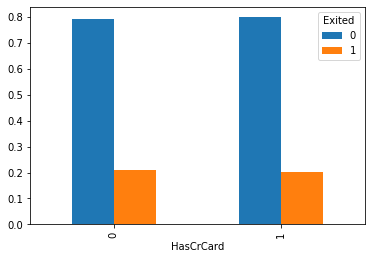

In [6]:
ccard_perc.plot(kind='bar')

In [7]:
#DONOT CHANGE THIS
df['bs']=df['Balance']/df['EstimatedSalary']
df['ta']=df['Tenure']/df['Age']
df['ca']=df['CreditScore']/df['Age']
df_train = df.sample(frac=0.8,random_state=11)
df_test = df.drop(df_train.index)

from sklearn.base import BaseEstimator, TransformerMixin
#We provide the required transformers to build the pipeline.
# Transfomer for performing one hot encoding on a specified categorical column
class OneHotEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self,col):
        self.col = col
                
    def transform(self, X):
        return pd.get_dummies(X[self.col]) 

    def fit(self, X, y=None):
        return self  
    
# Stateless transformer for selecting a specified columns
class DFSubsetSelector(BaseEstimator,TransformerMixin):
    
    def __init__(self,cols):
        self.cols = cols
        
    def transform(self ,X):
        return X[self.cols]
    
    def fit(self, X, y=None):
        return self
    
class ConcatFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self,cols,sep="_"):
        self.cols = cols
        self.sep = sep
                
    def transform(self, X):
        concat_col = self.sep.join(self.cols)
        return X.apply(lambda x : self.sep.join([x[col] for col in self.cols]) ,axis=1).to_frame(name = concat_col)

    def fit(self, X, y=None):
        return self  

#### (3) Min Max Transformation function

In [8]:
# Min Max Transformation function
class MinMaxScaler(BaseEstimator, TransformerMixin):
    def __init__(self,cols):
        self.cols=cols
    def transform(self, X):      
        return X[self.cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    def fit(self, X, y=None):
        return self

#### (4) Logistic Regression after preprocessing using pipeline

In [9]:
#4.0.Splitting datasets by dtypes
df_train[['NumOfProducts','HasCrCard','IsActiveMember','Exited']]=df_train[['NumOfProducts','HasCrCard','IsActiveMember','Exited']].astype('object')
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).drop(['bs','ta','ca'],axis=1).columns
categorical_features = df_train.select_dtypes(include=['object']).drop(['Exited'],axis=1).columns

In [10]:
#4.a.Creating a transformer for categorical variables
categorical_transformer=OneHotEncoder(categorical_features)
#4.b.Creating a transformer for numerical variables
numerical_transformer=MinMaxScaler(numeric_features)

#Combining transformations to preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
#Pipeline including logistic regression model
final=Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [11]:
#4.c.Logistic regression
#Creating train data and fitting the model
X_train=df_train.drop(columns=['Exited','bs','ta','ca'])
Y_train=df_train[['Exited']].astype('int')
final.fit(X_train,Y_train)

#Creating test data
df_test[['NumOfProducts','HasCrCard','IsActiveMember','Exited']]=df_test[['NumOfProducts','HasCrCard','IsActiveMember','Exited']].astype('object')
X_test=df_test.drop(columns=['Exited','bs','ta','ca'])
Y_test=df_test[['Exited']].astype('int')

#Predicting on train and test data using predict for F1 score
y_pred_tr=final.predict(X_train)
y_pred_ts=final.predict(X_test)

#Predicting on train and test data using predict_proba function for AUROC
y_pred_tr_pro=final.predict_proba(X_train)
y_pred_ts_pro=final.predict_proba(X_test)

#F1 score and AUROC on train and test
print ('F1 score on train dataset = ',round(metrics.f1_score(Y_train,y_pred_tr),4))
print ('F1 score on test dataset = ',round(metrics.f1_score(Y_test,y_pred_ts),4))
print ('AUROC on train dataset = ',round(metrics.roc_auc_score(Y_train,y_pred_tr_pro[:,1]),4))
print ('AUROC on test dataset = ',round(metrics.roc_auc_score(Y_test,y_pred_ts_pro[:,1]),4))

F1 score on train dataset =  0.4701
F1 score on test dataset =  0.5008
AUROC on train dataset =  0.827
AUROC on test dataset =  0.8578


#### (5) a. Retraining Logistic Regression model with added metrics

In [12]:
#Creating new list of numeric features (including the three derived variables)
numeric_features1 = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features1 = df_train.select_dtypes(include=['object']).drop(['Exited'],axis=1).columns
numerical_transformer1=MinMaxScaler(numeric_features1)
categorical_transformer1=OneHotEncoder(categorical_features1)

#Creating new pipeline for the dataset with new features
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer1, numeric_features1),
        ('cat', categorical_transformer1, categorical_features1)])

final1=Pipeline(steps=[('preprocessor', preprocessor1),
                      ('classifier', LogisticRegression())])

In [13]:
#Fitting logistic regression on train data after preprocessing using the pipeline
X_train_1=df_train.drop(columns=['Exited'])
Y_train_1=df_train[['Exited']].astype('int')
final1.fit(X_train_1,Y_train_1)

#Preprocessing on test data
X_test_1=df_test.drop(columns=['Exited'])
Y_test_1=df_test[['Exited']].astype('int')

#Predicting on test and train data using predict for F1 score
y_pred_tr_1=final1.predict(X_train_1)
y_pred_ts_1=final1.predict(X_test_1)

#Predicting on test and train data using predict_proba for AUROC
y_pred_tr_1_pro=final1.predict_proba(X_train_1)
y_pred_ts_1_pro=final1.predict_proba(X_test_1)

#F1 score and AUROC on train and test
print ('F1 score on train dataset after adding new metrics = ',round(metrics.f1_score(Y_train_1,y_pred_tr_1),4))
print ('F1 score on test dataset after adding new metrics = ',round(metrics.f1_score(Y_test_1,y_pred_ts_1),4))
print ('AUROC on train dataset after adding new metrics = ',round(metrics.roc_auc_score(Y_train_1,y_pred_tr_1_pro[:,1]),4))
print ('AUROC on test dataset after adding new metrics = ',round(metrics.roc_auc_score(Y_test_1,y_pred_ts_1_pro[:,1]),4))

F1 score on train dataset after adding new metrics =  0.4852
F1 score on test dataset after adding new metrics =  0.5435
AUROC on train dataset after adding new metrics =  0.8296
AUROC on test dataset after adding new metrics =  0.8583


#### (5) b. Retraining Logistic Regression model after balancing

In [14]:
#Creating new model pipeline after balancing classes
final2=Pipeline(steps=[('preprocessor', preprocessor1),
                      ('classifier', LogisticRegression(class_weight='balanced'))])
final2.fit(X_train_1,Y_train_1)

#Predicting on test and train data using predict for FI score
y_pred_tr_2=final2.predict(X_train_1)
y_pred_ts_2=final2.predict(X_test_1)

#Predicting on test and train data using predict_proba for AUROC
y_pred_tr_2_pro=final2.predict_proba(X_train_1)
y_pred_ts_2_pro=final2.predict_proba(X_test_1)

#F1 score and AUROC on train and test
print ('F1 score on train dataset after balancing classes = ',round(metrics.f1_score(Y_train_1,y_pred_tr_2),4))
print ('F1 score on test dataset after balancing classes = ',round(metrics.f1_score(Y_test_1,y_pred_ts_2),4))
print ('AUROC on train dataset after balancing classes = ',round(metrics.roc_auc_score(Y_train_1,y_pred_tr_2_pro[:,1]),4))
print ('AUROC on test dataset after balancing classes = ',round(metrics.roc_auc_score(Y_test_1,y_pred_ts_2_pro[:,1]),4))

F1 score on train dataset after balancing classes =  0.5547
F1 score on test dataset after balancing classes =  0.5899
AUROC on train dataset after balancing classes =  0.8298
AUROC on test dataset after balancing classes =  0.8591


#### (6) MLP Pipelines by varying parameters: The MLP model with 200 hidden units, relu activation and adam optimizer has the highest F1 score of 0.619

In [29]:
#Defining Function to loop over the 12 MLPs: 
roc_requirements=[]
def loop_neural (hidden_units,act_func,optimizer,iteration_nbr):
    final_mlp=Pipeline(steps=[('preprocessor', preprocessor1),
                      ('classifier',  MLPClassifier(random_state=1,hidden_layer_sizes=(hidden_units,3),activation=act_func,solver=optimizer))])
    final_mlp.fit(X_train_1,Y_train_1)
    y_pred_ts_mlp=final_mlp.predict(X_test_1)
    f1_Score = metrics.f1_score(Y_test_1,y_pred_ts_mlp)
    print (str(iteration_nbr) + ". A 3 layer MLP with "+str(hidden_units)+" hidden units, "+str(act_func)+" activation and "+str(optimizer)+" solver has an F1 score of "+str(round(f1_Score,4)))
    y_pred_ts_mlp_pro=final_mlp.predict_proba(X_test_1)
    fpr, tpr, threshold = metrics.roc_curve(Y_test_1, y_pred_ts_mlp_pro[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    roc_requirements.append([fpr,tpr,roc_auc,iteration_nbr])
    return metrics.f1_score(Y_test_1,y_pred_ts_mlp)

In [30]:
#Creating the 12 combinations to be passed to the MLP function:
twelve_mlps=[[100,150,200],['relu','tanh'],['sgd','adam']]
n=[1,2,3,4,5,6,7,8,9,10,11,12]
mlps_twelve_list=list(itertools.product(*twelve_mlps))

#Loop to pass 12 MLP specs to function
x=0
for i in mlps_twelve_list:
    loop_neural(i[0],i[1],i[2],n[x])
    x+=1

1. A 3 layer MLP with 100 hidden units, relu activation and sgd solver has an F1 score of 0.5323
2. A 3 layer MLP with 100 hidden units, relu activation and adam solver has an F1 score of 0.6127
3. A 3 layer MLP with 100 hidden units, tanh activation and sgd solver has an F1 score of 0.5529
4. A 3 layer MLP with 100 hidden units, tanh activation and adam solver has an F1 score of 0.6086
5. A 3 layer MLP with 150 hidden units, relu activation and sgd solver has an F1 score of 0.5629
6. A 3 layer MLP with 150 hidden units, relu activation and adam solver has an F1 score of 0.6203
7. A 3 layer MLP with 150 hidden units, tanh activation and sgd solver has an F1 score of 0.5534
8. A 3 layer MLP with 150 hidden units, tanh activation and adam solver has an F1 score of 0.5506
9. A 3 layer MLP with 200 hidden units, relu activation and sgd solver has an F1 score of 0.5601
10. A 3 layer MLP with 200 hidden units, relu activation and adam solver has an F1 score of 0.6198
11. A 3 layer MLP with 2

No handles with labels found to put in legend.


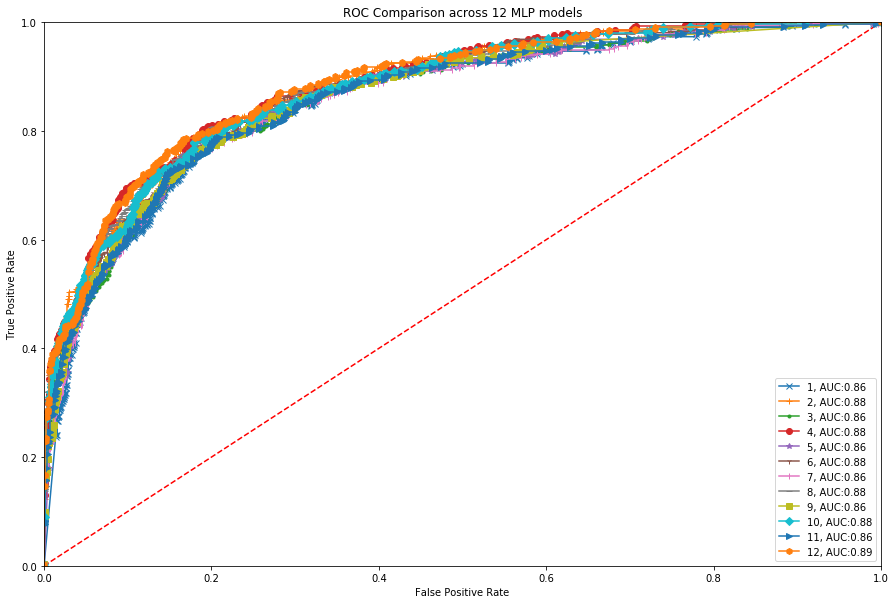

In [17]:
#Defining function to create plots for all 12 MLPs
fig,ax = plt.subplots()
ax.set_title('ROC Comparison across 12 MLP models')   
ax.legend(loc = 'lower right')
ax.plot([0, 1], [0, 1],'r--')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
fig.set_size_inches(15, 10, forward=True)

marker = itertools.cycle(('x', '+', '.', 'o', '*','1','|','_','s','D','>','h'))
def plot_loop(fpr,tpr,roc_auc,iteration_nbr):
    ax.plot(fpr, tpr, marker=next(marker),label=str(iteration_nbr) + ", AUC:" + str(round(roc_auc,2))) 
    ax.legend(loc='lower right')
    
#Loop to pass all 12 MLPs to the plot function
for i in roc_requirements:
    plot_loop(i[0],i[1],i[2],i[3])

#### (7) Decision Tree and Naive Baye's + Plotting ROC curves for all models built

In [18]:
#Decision tree 
final_DT=Pipeline(steps=[('preprocessor', preprocessor1),
                      ('classifier', DecisionTreeClassifier())])
final_DT.fit(X_train_1,Y_train_1)

y_pred_tr_dt=final_DT.predict_proba(X_train_1)
y_pred_ts_dt=final_DT.predict_proba(X_test_1)

In [19]:
#Gaussian Naive Baye's
final_NB=Pipeline(steps=[('preprocessor', preprocessor1),
                      ('classifier', GaussianNB())])
final_NB.fit(X_train_1,Y_train_1)

y_pred_tr_nb=final_NB.predict_proba(X_train_1)
y_pred_ts_nb=final_NB.predict_proba(X_test_1)

In [20]:
#ROC Metrics for all models
#Decision Tree
fpr, tpr, threshold = metrics.roc_curve(Y_test_1, y_pred_ts_dt[:,1])
roc_auc = metrics.auc(fpr, tpr)

#Naive Baye's
fpr_nb, tpr_nb, threshold_nb = metrics.roc_curve(Y_test_1, y_pred_ts_nb[:,1])
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)

#Logistic Regression
fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(Y_test_1, y_pred_ts_2_pro[:,1])
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)

#Best MLP
final_mlp=Pipeline(steps=[('preprocessor', preprocessor1),
                      ('classifier',  MLPClassifier(hidden_layer_sizes=(200,3),activation='relu',solver='adam'))])
final_mlp.fit(X_train_1,Y_train_1)
y_pred_ts_mlp_pro=final_mlp.predict_proba(X_test_1)
fpr_mlp, tpr_mlp, threshold_mlp = metrics.roc_curve(Y_test_1, y_pred_ts_mlp_pro[:,1])
roc_auc_mlp = metrics.auc(fpr_mlp, tpr_mlp)

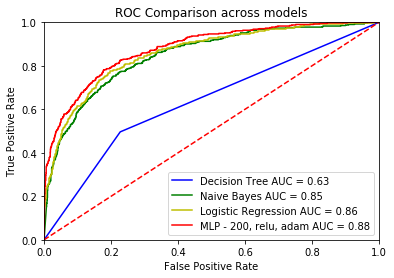

In [25]:
#Plots for all models
plt.title('ROC Comparison across models')
plt.plot(fpr, tpr, 'b', label = 'Decision Tree AUC = %0.2f' % roc_auc)
plt.plot(fpr_nb, tpr_nb, 'g', label = 'Naive Bayes AUC = %0.2f' % roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, 'y', label = 'Logistic Regression AUC = %0.2f' % roc_auc_lr)
plt.plot(fpr_mlp, tpr_mlp, 'r', label = 'MLP - 200, relu, adam AUC = %0.2f' % roc_auc_mlp)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### (8) Comparison of calibration curves: MLP is calibrated the best among the models, Naive Bayes and Logistic are not well calibrated

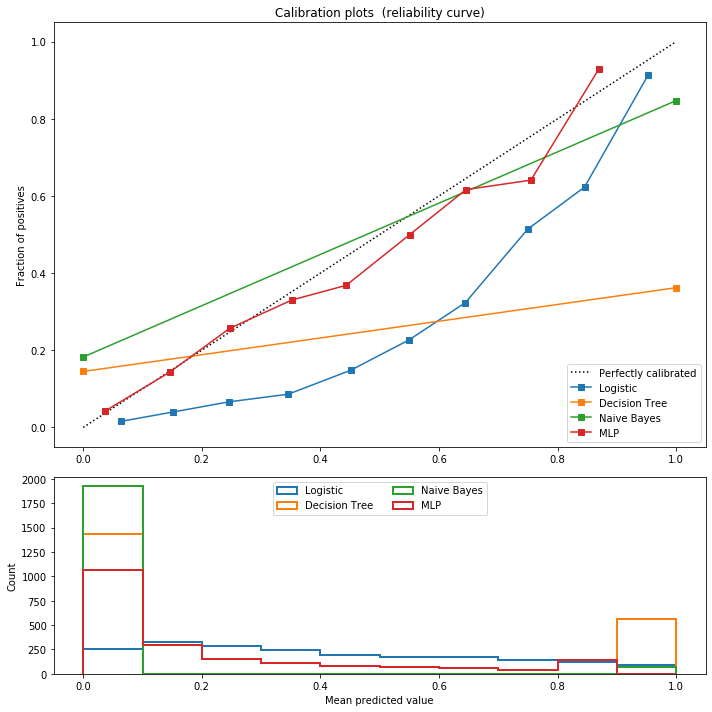

In [26]:
from sklearn.calibration import calibration_curve
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for clf, name in [(final2, 'Logistic'),
                      (final_DT, 'Decision Tree'),
                      (final_NB, 'Naive Bayes'),(final_mlp,'MLP')]:
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test_1)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test_1)
        prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

    fraction_of_positives, mean_predicted_value = \
        calibration_curve(Y_test_1, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()